In [249]:
# the importing of modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

This study is devoted to the topic of **employee turnover**. For this work, we turned to the dataset published on [Kaggle](https://www.kaggle.com/datasets/lnvardanyan/hr-analytics), which contains HR analytics. Let's download the dataset and take a look at it in more detail.

In [250]:
# downloading the dataset with HR-analytics
df = pd.read_csv('https://raw.githubusercontent.com/sunastya/employee_churn/main/turnover.csv', encoding = "ISO-8859-1").dropna(axis=1, how='all')
# let's look at the dataset
df = df.reset_index().set_index(['index'])
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
index,,,,,,,,,,
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low


Here we can see the data which are contained in the dataset and its types:

In [251]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

If we do not take into account the index column, then we have **10 columns** containing useful HR information. **8 out of 10** are **numeric**, while **2** *("sales" and "salary")* are **qualitative variables**. This is important to take into account in the subsequent analysis.

Now let's take a look at **descriptive statistics**:

In [252]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Now let's see what **categories** are contained in cells with qualitative information:

In [253]:
print(df.sales.unique())
print(df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


We can say that we have a lot observations: ***14999***. Variables such as satisfaction_level, last_evaluation are indicators in the range *from 0 to 1*. number_project, average_montly_hours, time_spend_company are *integer data*. Work_accident, left, promotion_last_5years -- *dummy variables*. After viewing the dataset and its descriptive statistics, we can say what data we are working with:


*   **satisfaction_level** -- employee satisfaction level *(from 0 to 1)*
*   **last_evaluation** -- employee's last assessment *(from 0 to 1)*
*   **number_project** -- the number of projects an employee is working on
*   **average_montly_hours** -- average number of working hours per month, shows the employee's work schedule and workload
*   **time_spend_company** -- how long the employee is in the company
*   **Work_accident** -- presence of incidents at work *(0 - no; 1 - yes)*
*   **left** -- whether the employee left the company *(0 - no; 1 - yes)*
*   **promotion_last_5years** -- whether the employee had a promotion in the last 5 years *(0 - no; 1 - yes)*
*   **sales** -- department in which the employee works
*   **salary** -- salary level *(low, medium, high)*

Now we offer you to see how the level of staff turnover differs in different departments

<Figure size 432x288 with 0 Axes>

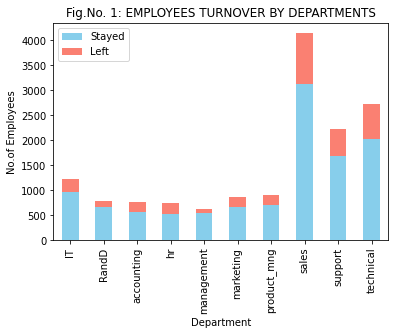

In [254]:
turnover_sum = pd.pivot_table(df, index=['sales'], columns=['left'], values=['satisfaction_level'], aggfunc='count')
plt.figure()
turnover_sum.plot.bar(title='Fig.No. 1: EMPLOYEES TURNOVER BY DEPARTMENTS', stacked=True, color = ['skyblue', 'salmon'])
plt.xlabel('Department')
plt.ylabel('No.of Employees')
plt.legend(['Stayed', 'Left'], loc='upper left')
warnings.filterwarnings("ignore")

We can notice that we have a different number of observations for different departments. Nevertheless, it is important to understand the ratio of those who left and those who remained in each of the departments, because this may be a *signal of some problems in the teams*.

<Figure size 432x288 with 0 Axes>

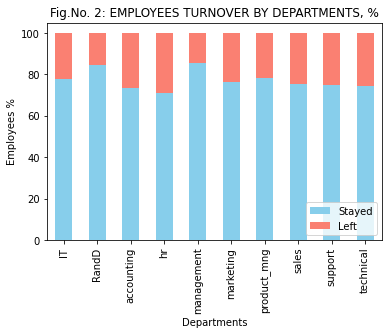

In [255]:
turnover_sum = turnover_sum.div(turnover_sum.sum(1).astype(float), axis=0)

plt.figure()
(turnover_sum*100).plot.bar(title='Fig.No. 2: EMPLOYEES TURNOVER BY DEPARTMENTS, %', stacked=True, color = ['skyblue', 'salmon'])
plt.xlabel('Departments')
plt.ylabel('Employees %')
plt.legend(['Stayed', 'Left'], loc='lower right')

Surprisingly, the highest level of employee turnover is in the HR department. It is about **30%** *(with the generally accepted norm - no more than 21% (look at the presentation Literature Review))*.
We are interested in this increased activity, so we would like to investigate it. Therefore, we ***narrow our dataset to the HR department***

In [256]:
turnover = df[df['sales'] == 'hr']
turnover.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
index,,,,,,,,,,
31,0.45,0.57,2,134,3,0,1,0,hr,low
32,0.40,0.51,2,145,3,0,1,0,hr,low
33,0.45,0.55,2,140,3,0,1,0,hr,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
108,0.71,0.87,3,177,4,0,1,0,hr,medium
109,0.40,0.49,2,155,3,0,1,0,hr,medium
110,0.43,0.47,2,144,3,0,1,0,hr,medium
111,0.09,0.85,6,289,4,0,1,0,hr,high
184,0.36,0.55,2,141,3,0,1,0,hr,medium


Our ***research question***: *what are the impact of level of satisfaction, last evaluation rate, number of projects, average montly hours of work, time spend in the compaby, presence of work accident, presence of promotion for 5 years and salary on the decision of a HR-specialist to leave a company?*

To answer this question, we turn to the method of ***logistic regression***. Our **dependent variable** is **left**. The **rest of the variables** will become our **independent variables**, the effect of which we will investigate. 

Before we start building the model, let's remember the type of our variables, because depending on this, it will be necessary to carry out some data preparation.

Also now we delete useless column *sales*

In [258]:
turnover1 = turnover
del turnover1['sales']
turnover1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                    object
dtype: object

Let's start with our qualitative variable - **"salary"**. We can notice that the data type is an object. But what data does it contain?

In [259]:
turnover1['salary'].head()

index
31        low
32        low
33        low
34        low
108    medium
Name: salary, dtype: object

You can see that this variable needs to be transformed into a *categorical type*. Moreover, it is necessary to make this variable *ordinal* and set the order: low, medium, high

In [260]:
my_categories = covered_type = pd.CategoricalDtype(categories= ["low", "medium", "high"], ordered=True)
turnover1['salary'] = turnover1['salary'].astype(my_categories)
turnover1['salary'].head()

index
31        low
32        low
33        low
34        low
108    medium
Name: salary, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

Now when variable is prepared, let's look at contingecy table showing the *salary distribution among those who left and who stayed in the company*

In [261]:
data_crosstab = pd.crosstab(turnover1['left'],
                            turnover1['salary'], 
                               margins = True)
print(data_crosstab)

salary  low  medium  high  All
left                          
0       243     242    39  524
1        92     117     6  215
All     335     359    45  739


We can say that in each salary group there are enough observation for building a model.

Now let's work with *quantitative variables*:
satisfaction_level, last_evaluation, number_project, average_montly_hours, 
time_spend_company, Work_accident, promotion_last_5years. There's its descriptive statistics

In [262]:
turnover1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
std,0.247929,0.174584,1.229168,50.366214,1.169510,0.325688,0.454501,0.141112
min,0.090000,0.370000,2.000000,98.000000,2.000000,0.000000,0.000000,0.000000
25%,0.430000,0.550000,3.000000,152.000000,3.000000,0.000000,0.000000,0.000000
50%,0.610000,0.720000,4.000000,197.000000,3.000000,0.000000,0.000000,0.000000
75%,0.805000,0.865000,4.000000,242.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,8.000000,1.000000,1.000000,1.000000


Now let's check that our numerical data has a normal distribution, because this is one of the assumptions of logistic regression. We will now plot a *histogram* for each variable. If we notice that the distribution is not normal, then we take the *logarithm of the given variable*.

Need transformation into logarithm


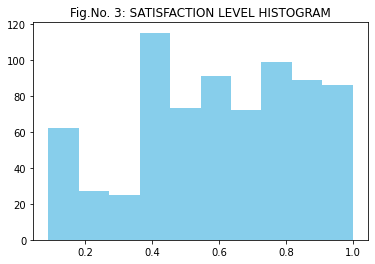

In [263]:
plt.hist(turnover1['satisfaction_level'], bins=10, color = ['skyblue'])
plt.title('Fig.No. 3: SATISFACTION LEVEL HISTOGRAM')
print('Need transformation into logarithm')

Text(0.5, 1.0, 'Fig.No. 4: TRANSFORMED SATISFACTION LEVEL HISTOGRAM')

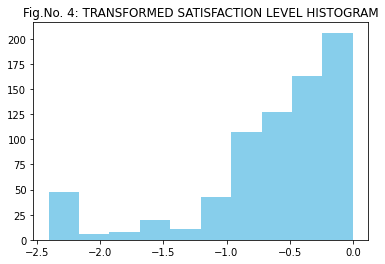

In [264]:
turnover1['satisfaction_level'] = np.log(turnover1['satisfaction_level'])
plt.hist(turnover1['satisfaction_level'], bins=10,  color = ['skyblue'])
plt.title('Fig.No. 4: TRANSFORMED SATISFACTION LEVEL HISTOGRAM')

Need transformation into logarithm


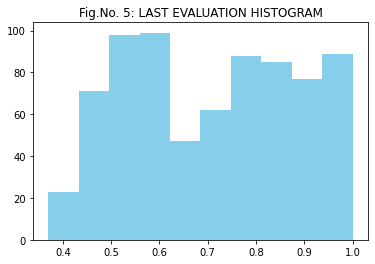

In [265]:
plt.hist(turnover1['last_evaluation'], bins=10,  color = ['skyblue'])
plt.title('Fig.No. 5: LAST EVALUATION HISTOGRAM')
print('Need transformation into logarithm')

Text(0.5, 1.0, 'Fig.No. 6: TRANSFORMED LAST EVALUATION HISTOGRAM')

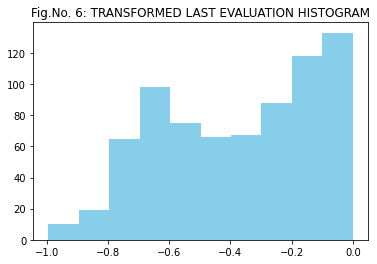

In [266]:
turnover1['last_evaluation'] = np.log(turnover1['last_evaluation'])
plt.hist(turnover1['last_evaluation'], bins=10, color = ['skyblue'])
plt.title('Fig.No. 6: TRANSFORMED LAST EVALUATION HISTOGRAM')

No need to transform into logarithm


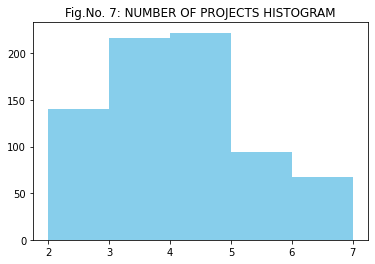

In [267]:
plt.hist(turnover1['number_project'], bins=5,  color = ['skyblue'])
plt.title('Fig.No. 7: NUMBER OF PROJECTS HISTOGRAM')
print('No need to transform into logarithm')

Need a transformation into logarithm


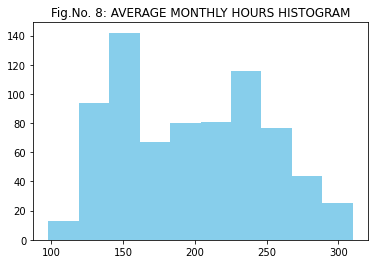

In [268]:
plt.hist(turnover1['average_montly_hours'], bins=10,  color = ['skyblue'])
plt.title('Fig.No. 8: AVERAGE MONTHLY HOURS HISTOGRAM')
print('Need a transformation into logarithm')

Text(0.5, 1.0, 'Fig.No. 9: TRANSFORMED AVERAGE MONTHLY HOURS HISTOGRAM')

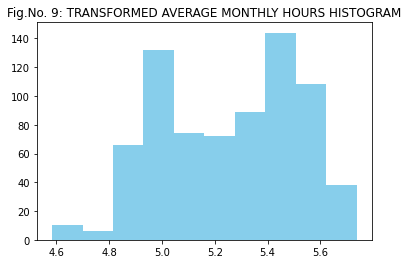

In [269]:
turnover1['average_montly_hours'] = np.log(turnover1['average_montly_hours'])
plt.hist(turnover1['average_montly_hours'], bins=10,  color = ['skyblue'])
plt.title('Fig.No. 9: TRANSFORMED AVERAGE MONTHLY HOURS HISTOGRAM')

Need a transformation into logarithm


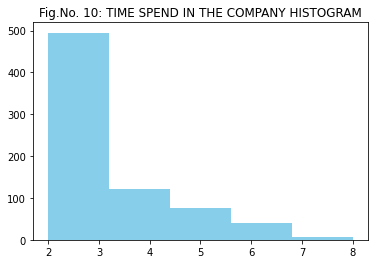

In [270]:
plt.hist(turnover1['time_spend_company'], bins=5,  color = ['skyblue'])
plt.title('Fig.No. 10: TIME SPEND IN THE COMPANY HISTOGRAM')
print('Need a transformation into logarithm')

Text(0.5, 1.0, 'Fig.No. 11: TRANSFORMED TIME SPEND IN THE COMPANY HISTOGRAM')

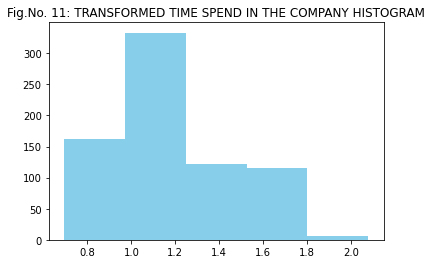

In [271]:
turnover1['time_spend_company'] = np.log(turnover1['time_spend_company'])
plt.hist(turnover1['time_spend_company'], bins=5,  color = ['skyblue'])
plt.title('Fig.No. 11: TRANSFORMED TIME SPEND IN THE COMPANY HISTOGRAM')

After we checked the normality of the distribution of numerical data, we can make sure that there is **no multicollinearity problem**. For this, the correlation matrix should **not have perfect parameters like 1 or -1**

In [272]:
corr = turnover1.corr()
corr.style.background_gradient(cmap='Blues')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.061383,-0.314226,-0.111244,-0.277371,0.083261,-0.439525,0.032689
last_evaluation,0.061383,1.000000,0.429779,0.342252,0.130160,-0.032236,-0.128243,-0.072830
number_project,-0.314226,0.429779,1.000000,0.486269,0.250349,-0.038213,-0.060181,-0.029874
average_montly_hours,-0.111244,0.342252,0.486269,1.000000,0.175689,0.003994,-0.051714,0.047996
time_spend_company,-0.277371,0.130160,0.250349,0.175689,1.000000,-0.070942,0.271301,0.172595
Work_accident,0.083261,-0.032236,-0.038213,0.003994,-0.070942,1.000000,-0.172946,0.094155
left,-0.439525,-0.128243,-0.060181,-0.051714,0.271301,-0.172946,1.000000,-0.092200
promotion_last_5years,0.032689,-0.072830,-0.029874,0.047996,0.172595,0.094155,-0.092200,1.000000


Everything is fine, ***there is no multicollinearity problem***.

Now when all data is prepared, we can transfrom our one categorical variable **"salary"** into the dummy one. The base will be *low salary*

In [273]:
turnover1 = pd.get_dummies(turnover1)
del turnover1['salary_low']

Final look at the data before building a model:

In [274]:
turnover1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_medium,salary_high
index,,,,,,,,,,
31,-0.798508,-0.562119,2,4.897840,1.098612,0,1,0,0,0
32,-0.916291,-0.673345,2,4.976734,1.098612,0,1,0,0,0
33,-0.798508,-0.597837,2,4.941642,1.098612,0,1,0,0,0
34,-0.174353,-0.139262,4,5.505332,1.791759,0,1,0,0,0
108,-0.342490,-0.139262,3,5.176150,1.386294,0,1,0,1,0


So, our model will be the following:

*(left) = b0 + b1 * (satisfaction_level) = b2 * (last_evaluation) + b3 * (number_project) + b4 * (average_montly_hours) + b5 * (time_spend_company) + b6 * (Work_accident) + b7 * (promotion_last_5years) + b8 * (salary)*

We will divide our sample on two parts: **train** and **test samples** *(20% and 80% respectively)*

In [275]:
X = turnover1.loc[:, turnover1.columns != 'left']
y = turnover1.loc[:, turnover1.columns == 'left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [276]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg = logreg.fit(X_train,y_train)

# making prdictions
y_pred=logreg.predict(X_test)

# results
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.844
Test set score: 0.811


We can say that both train and test samples gave us a **high accuracy**, that's why we can say that this model is **high-quality** one.

Let's look at **confusion matrix** for this model:

Text(0.5, 257.44, 'Predicted label')

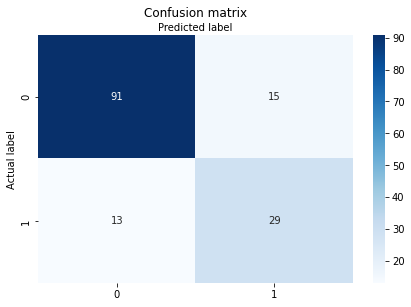

In [277]:
# import the metrics class

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Looks like we have a pretty good predictions: our model have *detected 29 employees, who wanted to leave the company*. However, it's important to look at other metrics

In [278]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8108108108108109
Precision: 0.6590909090909091
Recall: 0.6904761904761905


Actually, we can conclude that the model is good according to Accuracy, Precision and Recall 

For logistic regression it's important to look at AUC curve. Usually AUC score = 1 represents perfect classifier, and AUC score = 0.5 represents a worthless classifier.


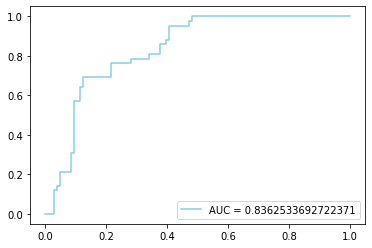

In [279]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC = "+str(auc), color = 'skyblue')
plt.legend(loc=4)
plt.show()

In our case, it is equal **0.836225**, which is *high result*

As we concluded, that our model have high quality, we can look at *the coefficients* closer:

In [280]:
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.424119
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                  739
Model:                          Logit   Df Residuals:                      730
Method:                           MLE   Df Model:                            8
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.2966
Time:                        17:47:46   Log-Likelihood:                -313.42
converged:                      False   LL-Null:                       -445.61
Covariance Type:            nonrobust   LLR p-value:                 1.546e-52
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -1.9101      0.190    -10.043      0.000      -2.283      -1.537
last_evaluation          -0.0978

Conlusions:

*   **Satisfaction level**: *sigificant result* -- the higher satisfaction_level the lower probability of leaving
*   **Number of projects**: *sigificant result* -- more project HR-specialist has the lower probability of his leaving. This may be due to the fact that with a heavy workload of projects, an HR specialist gets a variety of experience and does not have time to think about leaving work.
*   **Average montly hours**: *sigificant result* -- the bigger amount of time specialist spend on the work the lower probability of his leaving. The explanation may be the previous fact.
*   **Time spend in the company**: *sigificant result* -- the greater experience of work specialist have the higher probability of his leaving. This may be due to the fact that with a lot of experience in the company, the HR specialist becomes bored, he burns out and strives to get a new work experience. Or, with the greatest work experience, HR becomes more and more attractive in the labor market and more companies want to hunt him for themselves: more work experience - more favorable conditions are offered by other companies, due to which employees can leave their current place of work
*   **Work accident**: *sigificant result* -- the presence of some accidents at the work decreases the probability of leaving. Perhaps this is due to the fact that such situations bring the employee and the company closer, he becomes more loyal, because he and the company have a joint experience, he feels his contribution.
*   **Last evalution**, **Promotion** and **Salary**: *insigificant results* -- we need to observe it once more in other data








***Recommendations for companies***:

1.   Increase the level of employee satisfaction: for example, various bonuses (insurance, compensations, discounts for employees), pleasant atmosphere in the office (free cafe, coffee point, meeting rooms), good working conditions (equipment, high-quality software)
2.   Give HR specialists a variety of projects and keep them busy at work. In case of a temporary small load, fill working hours, for example, with trainings
3.   Support HR professionals who have been with the company for a long time with up-to-date wages in order to remain attractive to them in the employers' market. Show the specialist that the company appreciates his loyalty. You can give shares of the company or merch in order to motivate the employee to stay in the company




